# Desafio AAWZ
## Título
Desenvolver uma análise quantitativa e gráfica relacionando o aumento das ações da Petrobrás (PETR4) com as variações da taxa SELIC para os últimos 10 anos.
## Objetivo
Fazer um programa em python para:
- Extrair as informações dos sites: https://www.infomoney.com.br/petrobras-petr4/cotacoes e 
https://www.bcb.gov.br/pec/copom/port/taxaselic.asp e tratá-las;
- Armazenar as informações tratadas no SQLite;
 - Utilizar, de preferência, ORM (object relational mapping)
- Ler as informações do banco e apresentar em formato gráfico.

## Restrições
- Utilizar a biblioteca pandas do Python"

---
## ETL
- Vou utilizar a granularidade **anual** para a análise.
- Será feito 2 scrapping. Para garantir um serviço menos monolítico farei cada scrapping separado. Desta forma é possível garantir uma melhor manutenção de código.


## Granularidade anual: 
- Tanto a taxa selic quanto a PETR4 devem ser de mesma granularidade
- Nível do grão = ano
- Isso garante insights mais fáceis entre os dados

## Banco de dados
- As 2 tabelas no banco de dados armazenam somente os dados de fechamento.
- Acredito que assim trás uma análise mais fundamentalista sobre índices e ativos financeiros.
- Fiz algumas conversões de tipo para armazenar a menor quantidade possível de dados. 

In [3]:
import numpy as np
import pandas as pd
import sqlite3
import IPython.terminal
import os

import matplotlib.pyplot as plt
%matplotlib inline

# para visualizar de forma ampla dentro do notebook
plt.rcParams['figure.figsize'] = (15, 8)

## Preparação do diretório

In [4]:
def exit_current_directory():
    # Actual PATH
    path = os.getcwd()
    print('Current working directory:\n{}\n'.format(path))

    os.chdir('..')
    print('Change directory to:\n{}\n'.format(os.getcwd()))
    
exit_current_directory()

Current working directory:
/home/campos/projetos/challenges/challenge-aawz/notebooks

Change directory to:
/home/campos/projetos/challenges/challenge-aawz



## Preparação do ambiente

In [5]:
# from <package>.<module> import <class>
from src.prepare_environment import *


main()


Requirements this project:

pandas==0.23.0
matplotlib==2.2.2
numpy==1.14.3
ipython==7.4.0
scikit_learn==0.20.3
atlas==0.27.0

--------------------------------------------------
Configuration environment:

SO:
Linux
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.2 LTS
Release:	18.04
Codename:	bionic

Pip Version:
pip 10.0.1 from /home/campos/anaconda3/lib/python3.6/site-packages/pip (python 3.6)

Conda Version:
conda 4.6.8

Jupyter Version:
4.4.0

--------------------------------------------------
Structure this project:
.
├── config_environment.txt
├── data
│   └── desafio_AAWZ.db
├── LICENSE
├── notebooks
│   └── challenge_aawz.ipynb
├── README.md
├── requirements.txt
├── setup.py
└── src
    ├── challenge_aawz.py
    ├── check_config_environment.sh
    ├── create_requirements.sh
    ├── etl_PETR4.py
    ├── etl_SELIC.py
    ├── __init__.py
    ├── prepare_environment.py
    ├── __pycache__
    │   ├── __init__.cpython-36.pyc
    │   └── prepare_environment.cpython-36.pyc
    

In [6]:
!python3 src/etl_PETR4.py

get page:  <Response [200]>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 0
Data columns (total 2 columns):
Ano           10 non-null object
Fechamento    10 non-null float64
dtypes: float64(1), object(1)
memory usage: 240.0+ bytes
None

(petr4.db) salvo!


### Load

In [12]:
# Create connection
conn = sqlite3.connect('desafio_AAWZ.db')

#load data
df_petr4 = pd.read_sql_query("SELECT * FROM petr4", conn)

In [13]:
print(df_petr4)

    Ano  Fechamento
0  2010   27.296875
1  2011   21.484375
2  2012   19.515625
3  2013   17.078125
4  2014   10.023438
5  2015    6.699219
6  2016   14.867188
7  2017   16.093750
8  2018   22.687500
9  2019   27.000000


### Gráficos

#### Gráfico SELIC

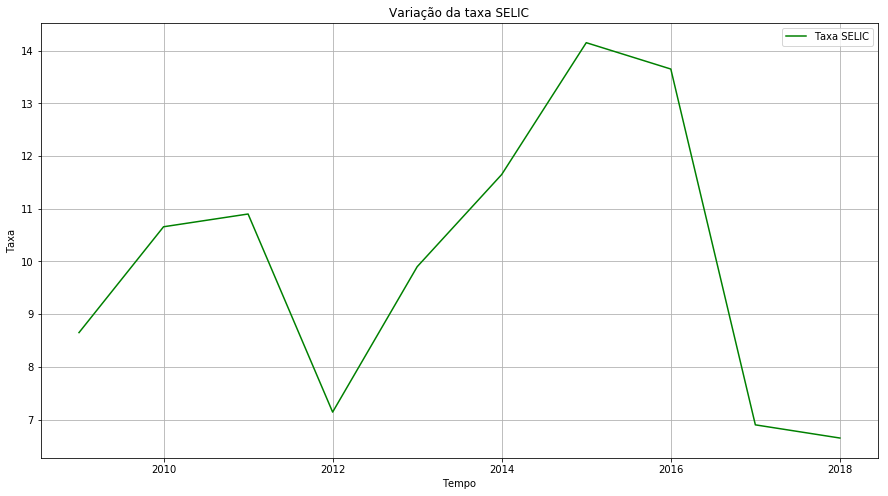

In [14]:
# visualização do gráfico SELIC\n",
x_selic = df_selic['Ano']
y_selic = df_selic['Taxa SELIC']

fig, selic_grafico = plt.subplots()
plt.plot(x_selic, y_selic, color='green', label='Taxa SELIC')
plt.grid()
plt.xlabel('Tempo')
plt.ylabel('Taxa')
plt.title("Variação da taxa SELIC")
plt.legend(loc="upper right")
plt.legend()
plt.show()

#### Gráfico PETR4

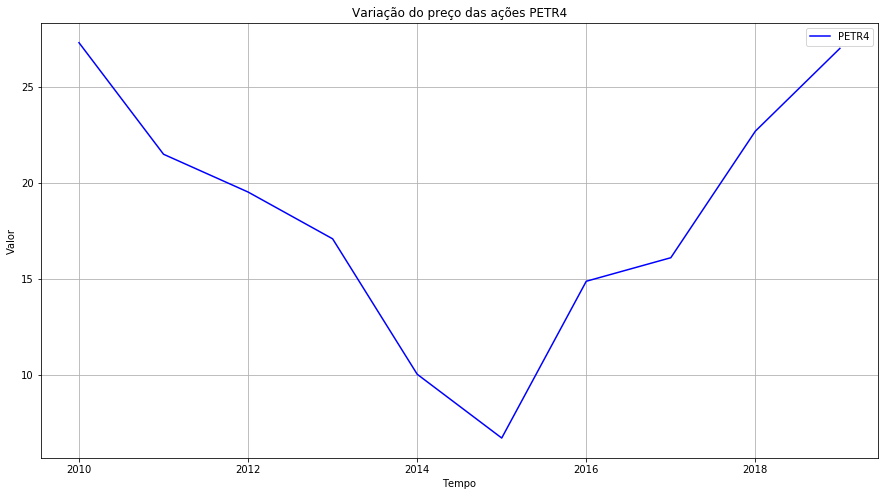

In [14]:
# visualização do gráfico PETR4\n",
x_petr4 = df_petr4['Ano']
y_petr4 = df_petr4['Fechamento']

fig, petr4_grafico = plt.subplots()
plt.plot(x_petr4, y_petr4, color='blue', label='PETR4')
plt.grid()
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.title("Variação do preço das ações PETR4")
plt.legend(loc="upper right")
plt.legend()
plt.show()

#### Plotagem no mesmo gráfico

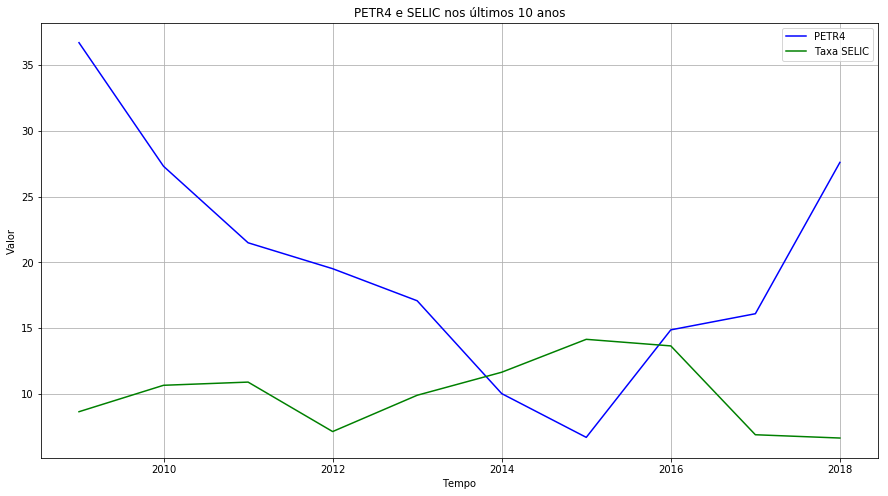

In [16]:
petr4_grafico = plt.plot(x_petr4, y_petr4, color='blue', label='PETR4')
selic_grafico = plt.plot(x_selic, y_selic, color='green', label='Taxa SELIC')

plt.grid()
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.title("PETR4 e SELIC nos últimos 10 anos")
plt.legend(loc="upper right")
plt.legend()
plt.show()

## Predição do fechamento do preço PETR4 a partir da taxa SELIC

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df_selic[['Taxa SELIC']]

# escolhendo a variável dependente\n",
y = df_petr4[['Fechamento']]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
                                    X,
                                    y,
                                    test_size=0.20)

In [32]:
model = LinearRegression()
model = model.fit(X_train, y_train)
y_pred_model = model.predict(X_test)

# prediction valor aleatório\n",
meta_selic = 10
predicao_petr4 = model.predict(meta_selic)

print(f'A predição do fechamento anual para PETR4, (se meta SELIC = {meta_selic}) baseado numa regressão linear é: R${predicao_petr4} reais.')

A predição do fechamento anual para PETR4, (se meta SELIC = 10) baseado numa regressão linear é: R$[[21.86948204]] reais.
